# 常用统计图汇总

本章节不涉及具体的统计学问题，也不涉及统计图的优雅展示，更不涉及真实的数据分析，仅作为使用 Python 来构造统计图的 demo 使用，让您大致清楚使用 Python 绘图的能力。

我认为傻瓜式的第一步是很重要的，很容易建立初学者对于新知识的信心。

在 Python 中，与统计绘图有关的库一般是 numpy pandas seaborn matplotlib scipy。而绘制每一张图，大致的步骤都是：先导入数据，然后绘制图像展示。

接下来，我们将一步步展示，如何用 Python 从 0-1 做到绘制常用统计图。

In [1]:
# 安装基础依赖库
!pip install matplotlib numpy pandas seaborn scipy

     |████████████████████████████████| 8.5 MB 169 kB/s eta 0:00:01
     |████████████████████████████████| 15.6 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 434 kB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 10.5 MB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 30.7 MB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 285 kB 6.7 MB/s eta 0:00:01


In [2]:
# Python 版本
!python --version
# 各个依赖库的版本
!pip list |grep matplotlib 
!pip list |grep numpy 
!pip list |grep pandas 
!pip list |grep seaborn
!pip list |grep scipy

Python 3.8.5
matplotlib          3.3.3
numpy               1.19.5
pandas              1.2.1
seaborn             0.11.1
scipy               1.6.0


### 折线图（以正弦函数为例）

In [3]:
import matplotlib.pyplot as plt
import numpy as np

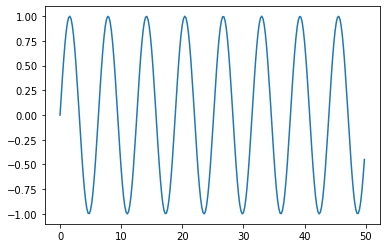

In [4]:
x = np.arange(0,50,0.2)
y = np.sin(x)
plt.plot(x,y)
plt.show()

### 多组数据复合折线图（以正余弦函数为例）

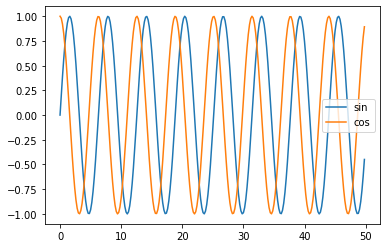

In [5]:
z = np.cos(x)

flg, axs = plt.subplots()

axs.plot(x, y, label="sin")
axs.plot(x, z, label="cos")

plt.legend()
plt.show()

### 散点图（以 500 个随机数为例）

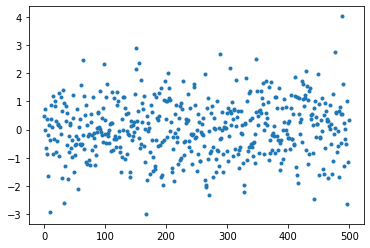

In [6]:
x = np.random.randn(500)
plt.plot(x,'.')
plt.show()

### 直方图

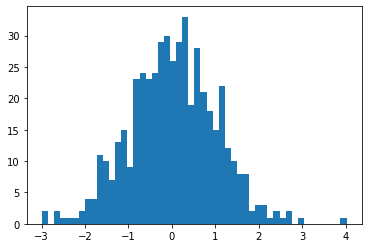

In [7]:
plt.hist(x,bins=50) # bins 指的是总数据分为几段
plt.show()

### 核密度估计图

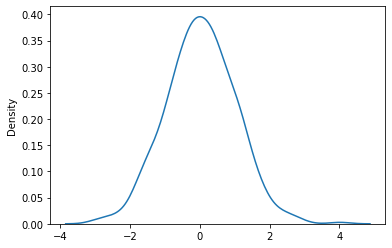

In [8]:
import seaborn as sns
sns.kdeplot(x)
plt.show()

### 累积频率

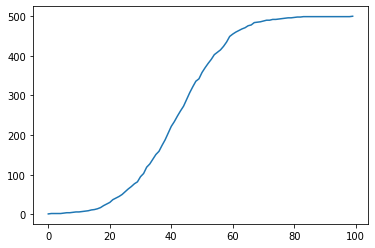

In [9]:
import scipy.stats as stats
plt.plot(stats.cumfreq(x,numbins=100)[0])
plt.show()

### 误差条图

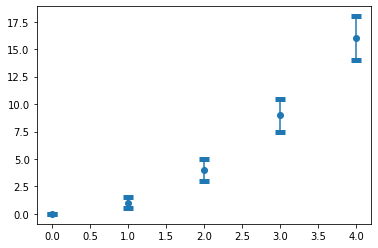

In [10]:
indexs = np.arange(5)
y = indexs**2
errorBar = indexs/2
plt.errorbar(indexs,y,yerr=errorBar,fmt='o',capsize=5,capthick=5)
plt.show()

### 箱形图

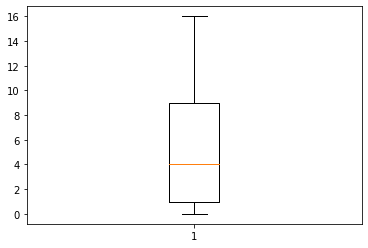

In [11]:
plt.boxplot(y, sym='*')
plt.show()

### 小提琴图

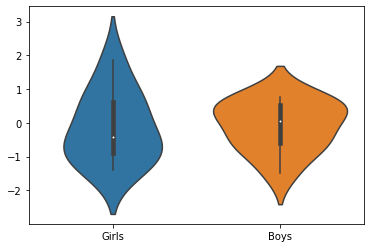

In [12]:
import pandas as pd
nd = stats.norm
data = nd.rvs(size=(10))

nd2 = stats.norm(loc = 3,scale = 1.5)
data2 = nd.rvs(size=(10))

df = pd.DataFrame({'Girls':data,'Boys':data2})

sns.violinplot(data=df)

plt.show()

### 分组的条形图

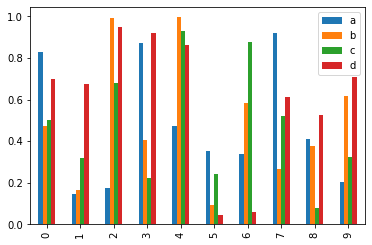

In [13]:
df = pd.DataFrame(np.random.rand(10,4),columns=['a','b','c','d'])
df.plot(kind='bar',grid=False)
plt.show()

In [14]:
df

,a,b,c,d
0,0.827847,0.472232,0.503941,0.697320
1,0.146570,0.165550,0.319243,0.675278
2,0.173934,0.991971,0.678212,0.951535
3,0.872323,0.408164,0.221855,0.919375
4,0.474285,0.995651,0.929295,0.863946
5,0.354784,0.094308,0.242250,0.044282
6,0.340091,0.582329,0.875371,0.059777
7,0.920288,0.266519,0.522511,0.612726
8,0.410228,0.376261,0.079166,0.528454
9,0.203562,0.615223,0.322126,0.710097


### 饼图

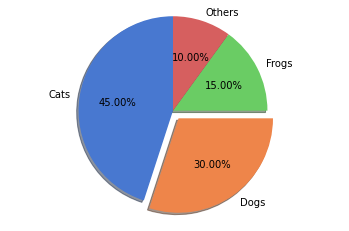

In [15]:
txtLabels = 'Cats', 'Dogs', 'Frogs', 'Others'
fractions = [45, 30, 15, 10]
offsets = (0, 0.1, 0, 0)
plt.pie(fractions, explode=offsets, 
        labels=txtLabels, autopct='%1.2f%%', shadow=True, startangle=90,colors=sns.color_palette('muted'))

plt.axis('equal')

plt.show()

### 二元变量散点图

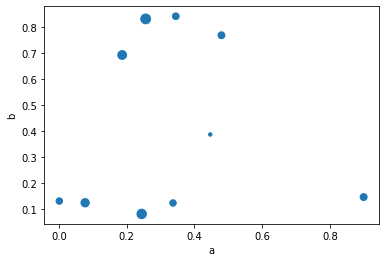

In [16]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2['c'] = df2['c']*100
df2.plot(kind='scatter', x='a', y='b', s='c')
plt.show()

In [17]:
df2

,a,b,c,d
0,0.899287,0.145661,48.438439,0.895283
1,0.244515,0.080748,89.148483,0.329503
2,0.001434,0.130266,41.719320,0.485611
3,0.256225,0.831726,96.562985,0.117492
4,0.446767,0.386714,11.688849,0.015517
5,0.077611,0.123730,69.320613,0.580056
6,0.479798,0.768833,47.332097,0.091906
7,0.186959,0.692763,77.679425,0.697030
8,0.345076,0.841980,44.921802,0.674387
9,0.336882,0.122898,41.638664,0.608273


### 3D 图

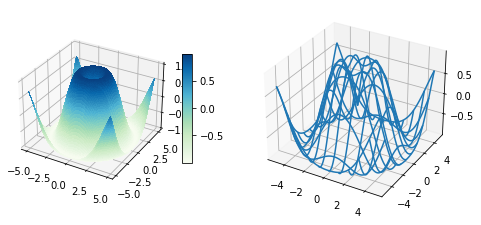

In [18]:
from matplotlib import cm

fig = plt.figure(figsize=plt.figaspect(0.5))

xv = np.arange(-5,5,0.1)
yv = np.arange(-5,5,0.1)

xv,yv = np.meshgrid(xv,yv)

rv = np.sqrt(xv**2 + yv**2)
zv = np.sin(rv)

ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(xv, yv, zv, rstride=1, cstride=1, cmap=cm.GnBu, linewidth=0, antialiased=False)
ax.set_zlim3d(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_wireframe(xv, yv, zv,rstride=10,cstride=10)

plt.show()